In [1]:
import pandas as pd
import mysql.connector as msql
from mysql.connector import Error
import seaborn as sns
import matplotlib.pyplot as plt
import credentials as cred


# Visualizing the Loan Application Data

## The Percentage of applications approved for self-employed applicants. Accessing the database.

In [8]:
try:
   
    conn = msql.connect(host = cred.host, database = 'creditcard_capstone', 
                        user = cred.user, password = cred.password)
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
except Error as e:
    print('Error while connecting to MySQL',e)

You're connected to database:  ('creditcard_capstone',)


## Querying the MySQL database 

In [14]:
self_applicant_approved = ('''SELECT Application_Status, COUNT(*) AS COUNT
                           FROM cdw_sapp_loan_application
                           WHERE Self_employed = "Yes"
                           GROUP BY Application_Status''')
cursor.execute(self_applicant_approved)
self_applicant_approvals = cursor.fetchall()



self_applicant_approvals_df = pd.DataFrame(self_applicant_approvals)
self_applicant_approvals_df

,0,1
0,Y,46
1,N,24


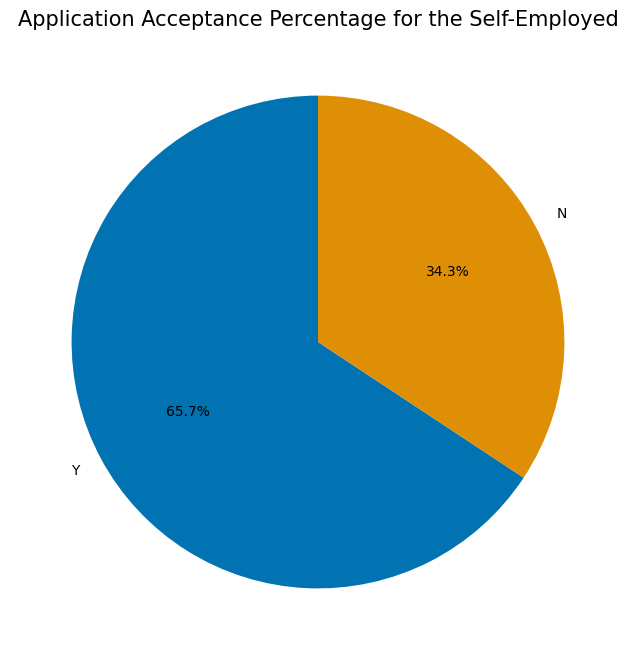

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(self_applicant_approvals_df.iloc[:, 1], labels=self_applicant_approvals_df.iloc[:, 0], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Application Acceptance Percentage for the Self-Employed', fontdict={'fontsize': 15})
plt.rc('axes', labelsize= 20)

plt.rcParams.update({'font.size': 15})
plt.show()

### Comparing to the total acceptance rate

In [18]:
all_others_status = ("SELECT Application_Status, COUNT(*) AS Count "
                    "FROM cdw_sapp_loan_application "
                    "GROUP BY Application_Status")
cursor.execute(all_others_status)                #cursor was assigned in the connect_sql() function
all_others_results = cursor.fetchall()          
all_others_status_df = pd.DataFrame(all_others_results)
all_others_status_df

,0,1
0,N,164
1,Y,347


### Comparison of self-employed vs all other applicants

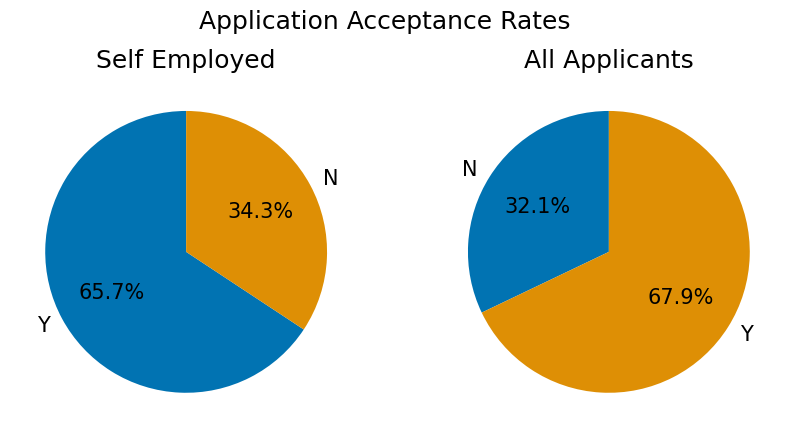

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Application Acceptance Rates")

# first pie chart
axes[0].pie(self_applicant_approvals_df.iloc[:, 1], labels=self_applicant_approvals_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
axes[0].set_title('Self Employed')

# second pie chart
axes[1].pie(all_others_status_df.iloc[:, 1], labels=all_others_status_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
axes[1].set_title('All Applicants')

plt.show()

### Self employed applicants have a lower acceptance rate than all others.

### Rejection percentage for married male applicants

In [20]:
married_male = ('''SELECT Application_Status, COUNT(*) AS Count
                    FROM cdw_sapp_loan_application
                    WHERE Gender = 'Male' AND Married = 'Yes'
                    GROUP BY Application_Status
                    ORDER BY Count DESC''')
cursor.execute(married_male)                #cursor was assigned in the connect_sql() function
married_male_results = cursor.fetchall()          
married_male_df = pd.DataFrame(married_male_results)
married_male_df

,0,1
0,Y,219
1,N,87


In [22]:
fig.suptitle("Application Acceptance Rates")
axes[0].pie(married_male_df.iloc[:, 1], labels=married_male_df.iloc[:, 0],\
    autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
axes[0].set_title('Married Males')

plt.show()

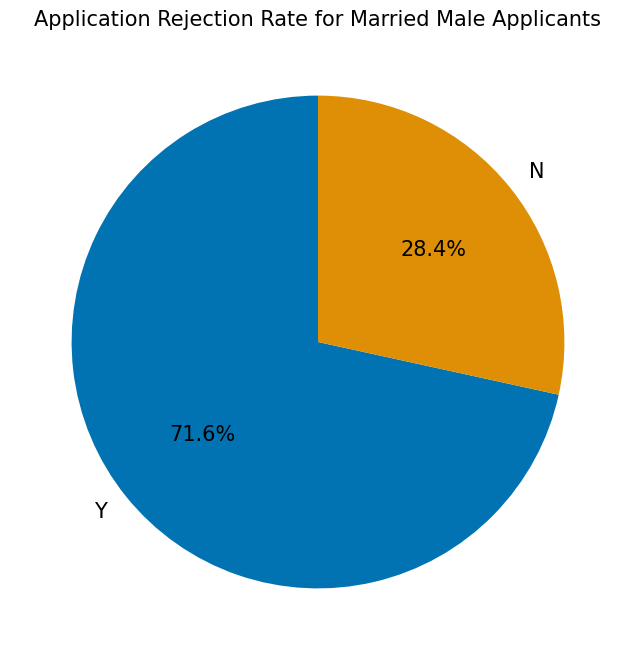

In [23]:
plt.figure(figsize=(8, 8))
plt.pie(married_male_df.iloc[:, 1], labels=married_male_df.iloc[:, 0], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('colorblind'))
plt.title('Application Rejection Rate for Married Male Applicants', fontdict={'fontsize': 15})
plt.rc('axes', labelsize= 20)

plt.rcParams.update({'font.size': 15})
plt.show()

### A majority of married male applicants are approved for a loan.

### Calculating and plotting the top three months with the largest volume of transaction data

In [24]:
top_three_months = ('''SELECT SUBSTRING(TIMEID,5,2) AS mon, sum(transaction_value) as total
                FROM cdw_sapp_credit_card
                GROUP BY mon
                ORDER BY total DESC
                LIMIT 3''')

cursor.execute(top_three_months)                #cursor was assigned in the connect_sql() function
top_three_months_results = cursor.fetchall()          
top_three_months_df = pd.DataFrame(top_three_months_results)
top_three_months_df

,0,1
0,10,202583.89
1,05,201310.26
2,12,201251.08


### Transforming the pandas df to reflect the month names. This is where sqlalchemy would allow directing reading of fetch(all) results to a dataframe that maintains column names.

In [30]:
top_three_months = ('''SELECT SUBSTRING(TIMEID,5,2) AS mon, sum(transaction_value) as total
                FROM cdw_sapp_credit_card
                GROUP BY mon
                ORDER BY total DESC
                LIMIT 3''')

cursor.execute(top_three_months)                #cursor was assigned in the connect_sql() function
top_three_months_results = cursor.fetchall() 
import pandas as pd

# ... (Your code to connect to the database and execute the query)
cursor.execute(top_three_months)
top_three_months_results = cursor.fetchall()

# Create a Pandas DataFrame from the fetched results
top_three_months_df = pd.DataFrame(top_three_months_results, columns=['Month', 'Total Value'])

# Map month numbers to month names
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Convert 'Month' column to string and replace with month names
top_three_months_df['Month'] = top_three_months_df['Month'].astype(str).replace(month_names)

print(top_three_months_df)



      Month  Total Value
0   October    202583.89
1       May    201310.26
2  December    201251.08


In [31]:
top_three_months_volume = ('''SELECT SUBSTRING(TIMEID,5,2) AS mon, count(transaction_value) as total
                FROM cdw_sapp_credit_card
                GROUP BY mon
                ORDER BY total DESC
                LIMIT 3''')

cursor.execute(top_three_months_volume)                #cursor was assigned in the connect_sql() function
top_three_months_volume_results = cursor.fetchall() 
import pandas as pd

top_three_months_volume_df = pd.DataFrame(top_three_months_volume_results, columns=['Month', 'Total Volume'])

# Map month numbers to month names
month_names = {
    '01': 'January',
    '02': 'February',
    '03': 'March',
    '04': 'April',
    '05': 'May',
    '06': 'June',
    '07': 'July',
    '08': 'August',
    '09': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Convert 'Month' column to string and replace with month names
top_three_months_volume_df['Month'] = top_three_months_volume_df['Month'].astype(str).replace(month_names)

print(top_three_months_volume_df)


      Month  Total Volume
0  February          3959
1       May          3946
2   October          3946


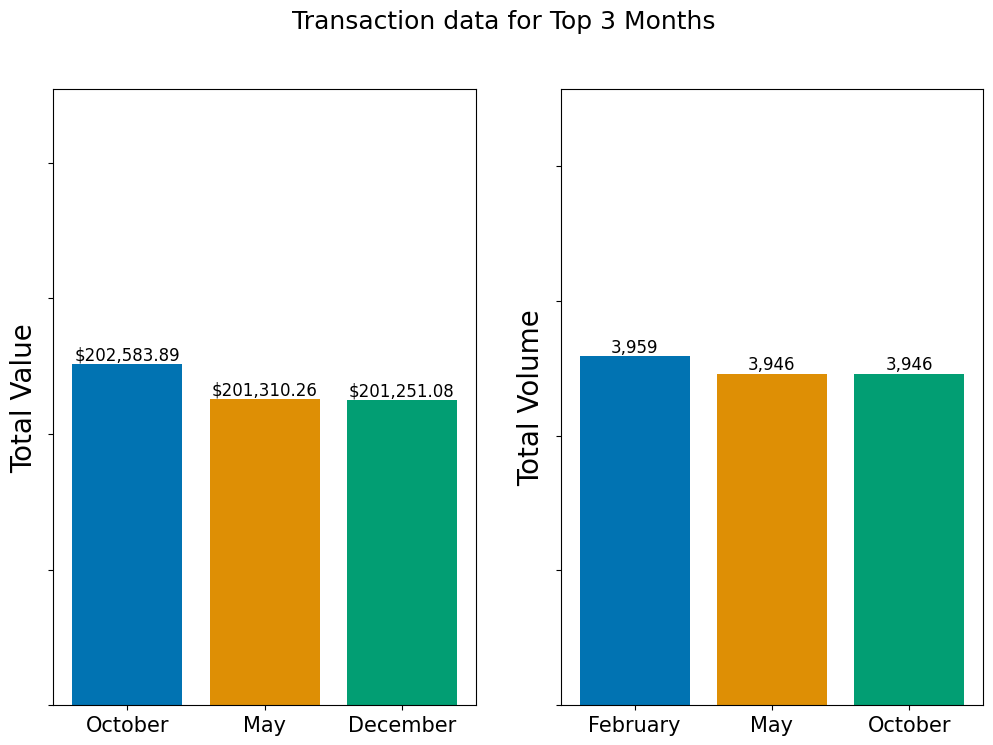

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
fig.suptitle("Transaction data for Top 3 Months")

# first bar chart
chart1 = axes[0].bar(top_three_months_df.iloc[:, 0], top_three_months_df.iloc[:, 1], color=sns.color_palette('colorblind'))
axes[0].set_ylabel('Total Value')
axes[0].set_ylim(bottom=190000)
axes[0].set_yticklabels([])
for bar in chart1:
    height = bar.get_height()
    text = '${:,.2f}'.format(height)   #format number to be a currency format
    axes[0].text(bar.get_x() + bar.get_width() / 2, height, text, ha='center', va='bottom', fontsize = 12)

# second bar chart
chart2 = axes[1].bar(top_three_months_volume_df.iloc[:, 0], top_three_months_volume_df.iloc[:, 1], color=sns.color_palette('colorblind'))
axes[1].set_ylabel('Total Volume')
axes[1].set_ylim(bottom=3700)
axes[1].set_yticklabels([])  
for bar in chart2:
    height = bar.get_height()
    text = '{:,}'.format(height)   #format number to be a currency format
    axes[1].text(bar.get_x() + bar.get_width() / 2, height, text, ha='center', va='bottom', fontsize = 12)

plt.show()

### Which Example Bank branch processed the highest value of  healthcare transactions

In [33]:
branch_healthcare_tv = ('''SELECT BRANCH_CODE, sum(transaction_value) as total
                    FROM cdw_sapp_credit_card
                    WHERE TRANSACTION_TYPE = 'healthcare'
                    GROUP BY BRANCH_CODE
                    ORDER BY total DESC
                    LIMIT 5''')
cursor.execute(branch_healthcare_tv)
branch_healthcare_tv_results = cursor.fetchall()
branch_healthcare_tv_df = pd.DataFrame(branch_healthcare_tv_results)
branch_healthcare_tv_df = branch_healthcare_tv_df.rename(columns = {0: 'Branch Code'})
branch_healthcare_tv_df = branch_healthcare_tv_df.rename(columns={1: 'Transaction Value'})
branch_healthcare_tv_df

,Branch Code,Transaction Value
0,25,4370.18
1,60,4072.04
2,83,4003.37
3,36,3823.87
4,111,3720.27


C:\Users\chito\AppData\Local\Temp\ipykernel_27976\1676261744.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart1 = sns.barplot(x=branch_healthcare_tv_df['Branch Code'], y=branch_healthcare_tv_df['Transaction Value'],\


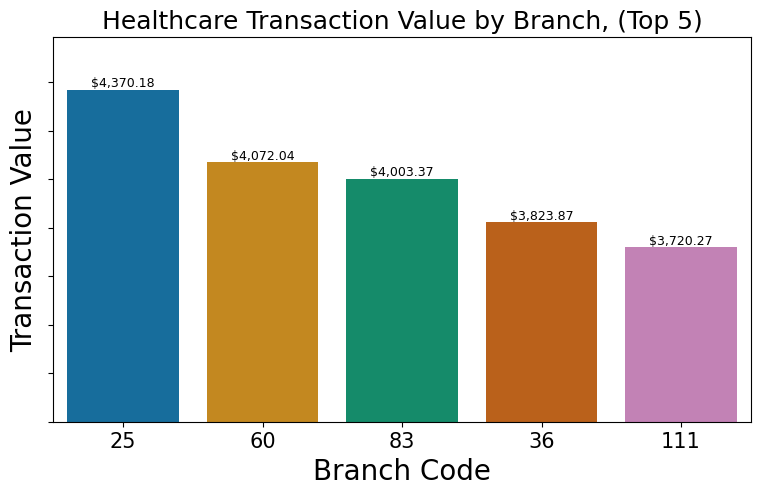

In [35]:
plt.figure(figsize=(9, 5))
chart1 = sns.barplot(x=branch_healthcare_tv_df['Branch Code'], y=branch_healthcare_tv_df['Transaction Value'],\
    order=branch_healthcare_tv_df.sort_values('Transaction Value', ascending=False)['Branch Code'], palette='colorblind')
# here we add the actual value to the top of each bar
for i, v in enumerate(branch_healthcare_tv_df['Transaction Value']):
    plt.annotate('${:,.2f}'.format(v), (i, v), ha='center', va='bottom', fontsize = 9)
    
chart1.set_ylim(bottom=3000)
chart1.set_yticklabels([])  
plt.title('Healthcare Transaction Value by Branch, (Top 5)')
plt.show()